<a href="https://colab.research.google.com/github/TarunKumar19/Cotton-Disease-Predection./blob/main/Cotton_Disease_Predection_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/train'
valid_path = '/content/drive/MyDrive/val'

In [5]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 3s 0us/step


In [14]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/data/train/*')
folders

['/content/drive/MyDrive/data/train/fresh cotton plant',
 '/content/drive/MyDrive/data/train/diseased cotton leaf',
 '/content/drive/MyDrive/data/train/fresh cotton leaf',
 '/content/drive/MyDrive/data/train/diseased cotton plant']

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [19]:
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [20]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.utils import array_to_img, img_to_array, load_img

In [23]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [25]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [34]:
# fit the model
# Run the cell. It will take some time to execute
history=model.fit(training_set,validation_data=test_set,epochs=20,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/20
61/61 [==============================] - 50s 817ms/step - loss: 0.5845 - accuracy: 0.7699 - val_loss: 1.1327 - val_accuracy: 0.6111
Epoch 2/20
61/61 [==============================] - 44s 721ms/step - loss: 0.6274 - accuracy: 0.7740 - val_loss: 0.8127 - val_accuracy: 0.8333
Epoch 3/20
61/61 [==============================] - 44s 714ms/step - loss: 0.5910 - accuracy: 0.7904 - val_loss: 1.0465 - val_accuracy: 0.7778
Epoch 4/20
61/61 [==============================] - 45s 741ms/step - loss: 0.6131 - accuracy: 0.7868 - val_loss: 1.2892 - val_accuracy: 0.7222
Epoch 5/20
61/61 [==============================] - 44s 722ms/step - loss: 0.5557 - accuracy: 0.7806 - val_loss: 1.1525 - val_accuracy: 0.7222
Epoch 6/20
61/61 [==============================] - 44s 721ms/step - loss: 0.5925 - accuracy: 0.7945 - val_loss: 0.8210 - val_accuracy: 0.8333
Epoch 7/20
61/61 [==============================] - 43s 704ms/step - loss: 0.7254 - accuracy: 0.7555 - val_loss: 0.6613 - val_accuracy: 0.7222

In [33]:
import matplotlib.pyplot as plt

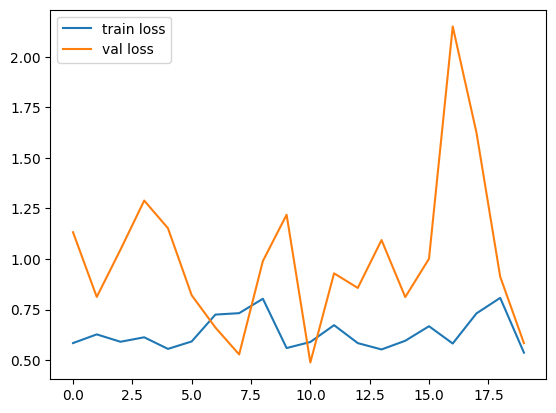

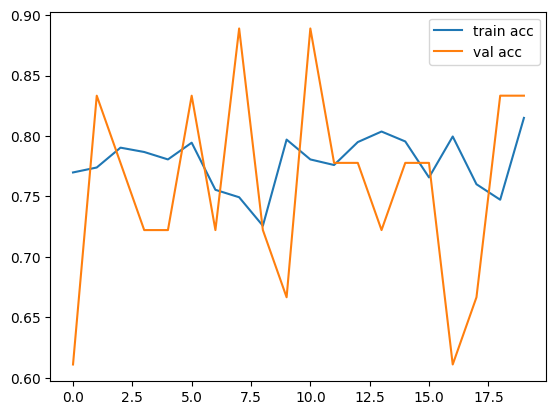

<Figure size 640x480 with 0 Axes>

In [35]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [36]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [37]:
y_pred = model.predict(test_set)

1/1 [==============================] - 5s 5s/step


In [38]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [41]:
model=load_model('model_resnet50.h5')

In [55]:
img=image.load_img('/content/drive/MyDrive/data/val/diseased cotton leaf/dis_leaf (100)_iaip.jpg',target_size=(224,224))

In [56]:
x=image.img_to_array(img)
x

array([[[175., 233., 157.],
        [177., 235., 159.],
        [178., 236., 160.],
        ...,
        [ 74.,  64.,  55.],
        [ 69.,  62.,  56.],
        [ 69.,  62.,  56.]],

       [[177., 235., 159.],
        [179., 237., 161.],
        [180., 238., 162.],
        ...,
        [ 69.,  59.,  50.],
        [ 60.,  53.,  47.],
        [ 59.,  52.,  46.]],

       [[178., 236., 160.],
        [180., 238., 162.],
        [182., 240., 164.],
        ...,
        [ 65.,  55.,  46.],
        [ 59.,  52.,  46.],
        [ 59.,  52.,  46.]],

       ...,

       [[115., 181., 120.],
        [109., 175., 114.],
        [108., 174., 113.],
        ...,
        [138., 216., 106.],
        [142., 221., 104.],
        [142., 221., 104.]],

       [[121., 181., 119.],
        [116., 176., 114.],
        [113., 173., 111.],
        ...,
        [140., 218., 108.],
        [143., 216., 108.],
        [145., 218., 110.]],

       [[118., 178., 116.],
        [117., 177., 115.],
        [116., 1

In [57]:
x.shape

(224, 224, 3)

In [58]:
x=x/255

In [59]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [60]:
model.predict(img_data)

1/1 [==============================] - 0s 26ms/step


array([[1.5814053e-03, 1.6255163e-29, 9.9841857e-01, 5.0844730e-36]],
      dtype=float32)

In [62]:
a=np.argmax(model.predict(img_data), axis=1)
a==1

1/1 [==============================] - 0s 24ms/step


array([False])

In [53]:
import tensorflow as tf
tf.__version__

'2.12.0'